# CNN model

### Packages

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the directory to your local dataset folder
dataset_dir = 'AlphaNumerics_img'

# Iterate through the files in the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

AlphaNumerics_img\ISL_sign1.PNG
AlphaNumerics_img\ISL_sign2.png
AlphaNumerics_img\ISL_sign3.png
AlphaNumerics_img\sign_mnist_test.csv
AlphaNumerics_img\sign_mnist_train.csv
AlphaNumerics_img\sign_mnist_test\sign_mnist_test.csv
AlphaNumerics_img\sign_mnist_train\sign_mnist_train.csv


### Loading and Preprocessing the dataset

In [34]:
train_df = pd.read_csv(r'AlphaNumerics_img\sign_mnist_test\sign_mnist_test.csv')
test_df = pd.read_csv(r'AlphaNumerics_img\sign_mnist_train\sign_mnist_train.csv')


#### Details of our test train csv

In [35]:
train_df.info()
print('\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


#### Description of all the values

In [36]:
test_df.describe()
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [37]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


here we don't need the label in `df_train` dataframe so we will be shifting if to data frame called `Train_label`

In [38]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [39]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(7172, 28, 28, 1)


In [40]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(27455, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [41]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [42]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [43]:
X_test=X_test.values.reshape(-1,28,28,1)


In [44]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7172, 28, 28, 1) (7172, 24) (27455, 28, 28, 1) (27455, 24)


#### Augmenting the image dataset to generate new data


In [45]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

#### Visualisation of Dataset

Text(0.5, 1.0, 'label: 13  letter: M')

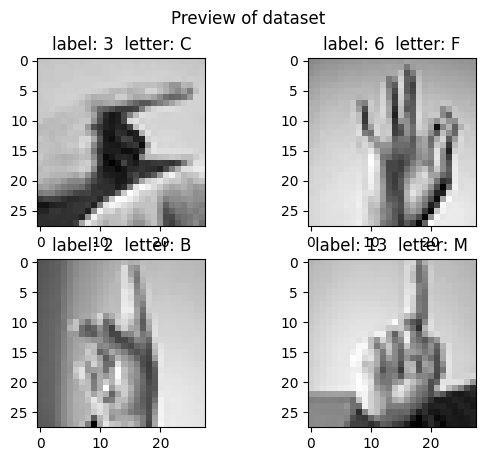

In [52]:


fig, axe = plt.subplots(2, 2)
fig.suptitle('Preview of dataset')
axe[0, 0].imshow(X_train[0].reshape(28, 28), cmap='gray')
axe[0, 0].set_title('label: 3  letter: C')
axe[0, 1].imshow(X_train[1].reshape(28, 28), cmap='gray')
axe[0, 1].set_title('label: 6  letter: F')
axe[1, 0].imshow(X_train[2].reshape(28, 28), cmap='gray')
axe[1, 0].set_title('label: 2  letter: B')
axe[1, 1].imshow(X_train[4].reshape(28, 28), cmap='gray')
axe[1, 1].set_title('label: 13  letter: M')


Text(0.5, 1.0, 'Frequency of each label')

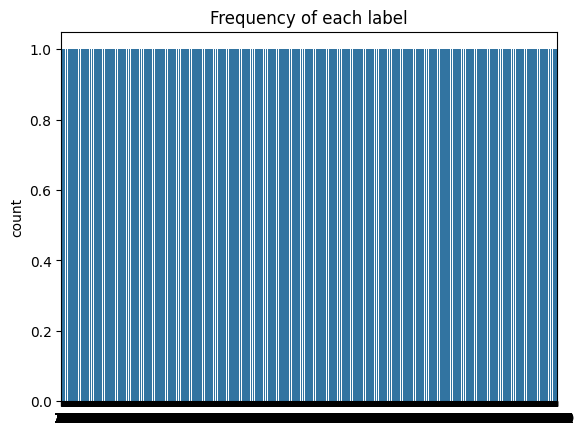

In [63]:
sns.countplot(train_label)
plt.title("Frequency of each label")

In [65]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [66]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,352 (1.22 MB)

 Trainable params: 319,352 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35


c:\Users\suvam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 511ms/step - accuracy: 0.0620 - loss: 3.1572 - val_accuracy: 0.0401 - val_loss: 3.2395
Epoch 2/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 502ms/step - accuracy: 0.0911 - loss: 3.1178 - val_accuracy: 0.0581 - val_loss: 3.1734
Epoch 3/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 558ms/step - accuracy: 0.1345 - loss: 2.9392 - val_accuracy: 0.1258 - val_loss: 2.8039
Epoch 4/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 678ms/step - accuracy: 0.1953 - loss: 2.6653 - val_accuracy: 0.2497 - val_loss: 2.3633
Epoch 5/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 538ms/step - accuracy: 0.2636 - loss: 2.4038 - val_accuracy: 0.3288 - val_loss: 2.1192
Epoch 6/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 503ms/step - accuracy: 0.3254 - loss: 2.1720 - val_accuracy: 0.4017 - val_loss: 1.8982
Epoch 7/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 498ms/step - accuracy: 0.3759 - loss: 1.9818 - val_accuracy: 0.4843 - val_loss: 1.6260
Epoch 8/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 500ms/step - accuracy: 0.4253 - loss: 1.7832 - val_accuracy: 0.500

In [69]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7976 - loss: 0.7819


In [70]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 79.74867820739746%


In [71]:
model.save('sign_language_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
The predicted label for the image is: [10]


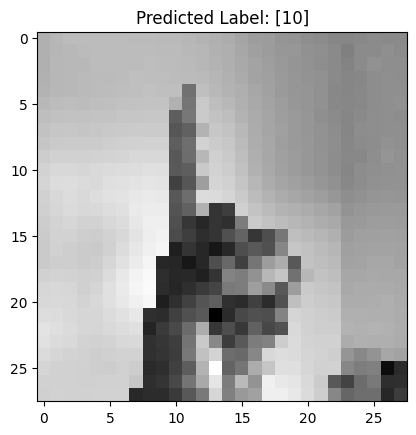

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('sign_language_model.h5')

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Predict the sign language letter
def predict_sign(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction, axis=1)
    return predicted_label

# Example usage
img_path = 'suvam1.jpg'
predicted_label = predict_sign(img_path)
print(f'The predicted label for the image is: {predicted_label}')

# Display the image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()
